<a href="https://colab.research.google.com/github/SalsabilaFirdausy/PCVK_Genap_2021/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Gamma correction pada citra
---------------------------
Masukkan nilai Gamma: 3


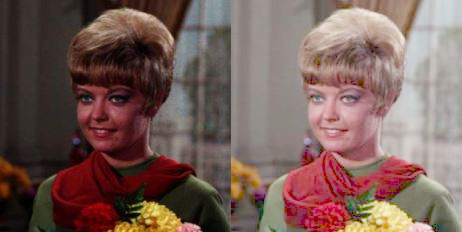

In [ ]:
# Practice 1

import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print('Gamma correction pada citra')
print('---------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/week3-woman.JPG')
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c]/255,(1/gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

 Average Denoising
----------------------------------
Masukkan number of image in average: 100


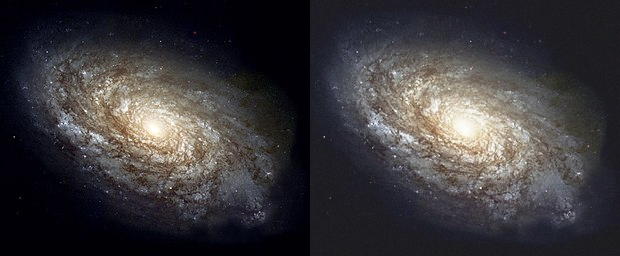

In [20]:
# Practice 3 (db 5)

import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from math import log10, sqrt
import glob

print(' Average Denoising')
print('----------------------------------')
try:
  total = int(input('Masukkan number of image in average: '))
except ValueError:
  print('Error, not a number')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/week5-noises/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)
img1 = cv.imread('//content/drive/MyDrive/PCVK/week5-galaxy.jpg')

dst = cv_img[0]
for i in range(total):
    if i == 0:
        pass
    else:
        alpha = 1.0/(i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if(mse == 0):
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr
def main(): 
     img2 = dst
     value = PSNR(img1, img2) 
     print(f"PSNR value is {value} dB") 

if __name__== "_main_": 
    main() 

final_frame = cv.hconcat((img1,dst))
cv2_imshow(final_frame)

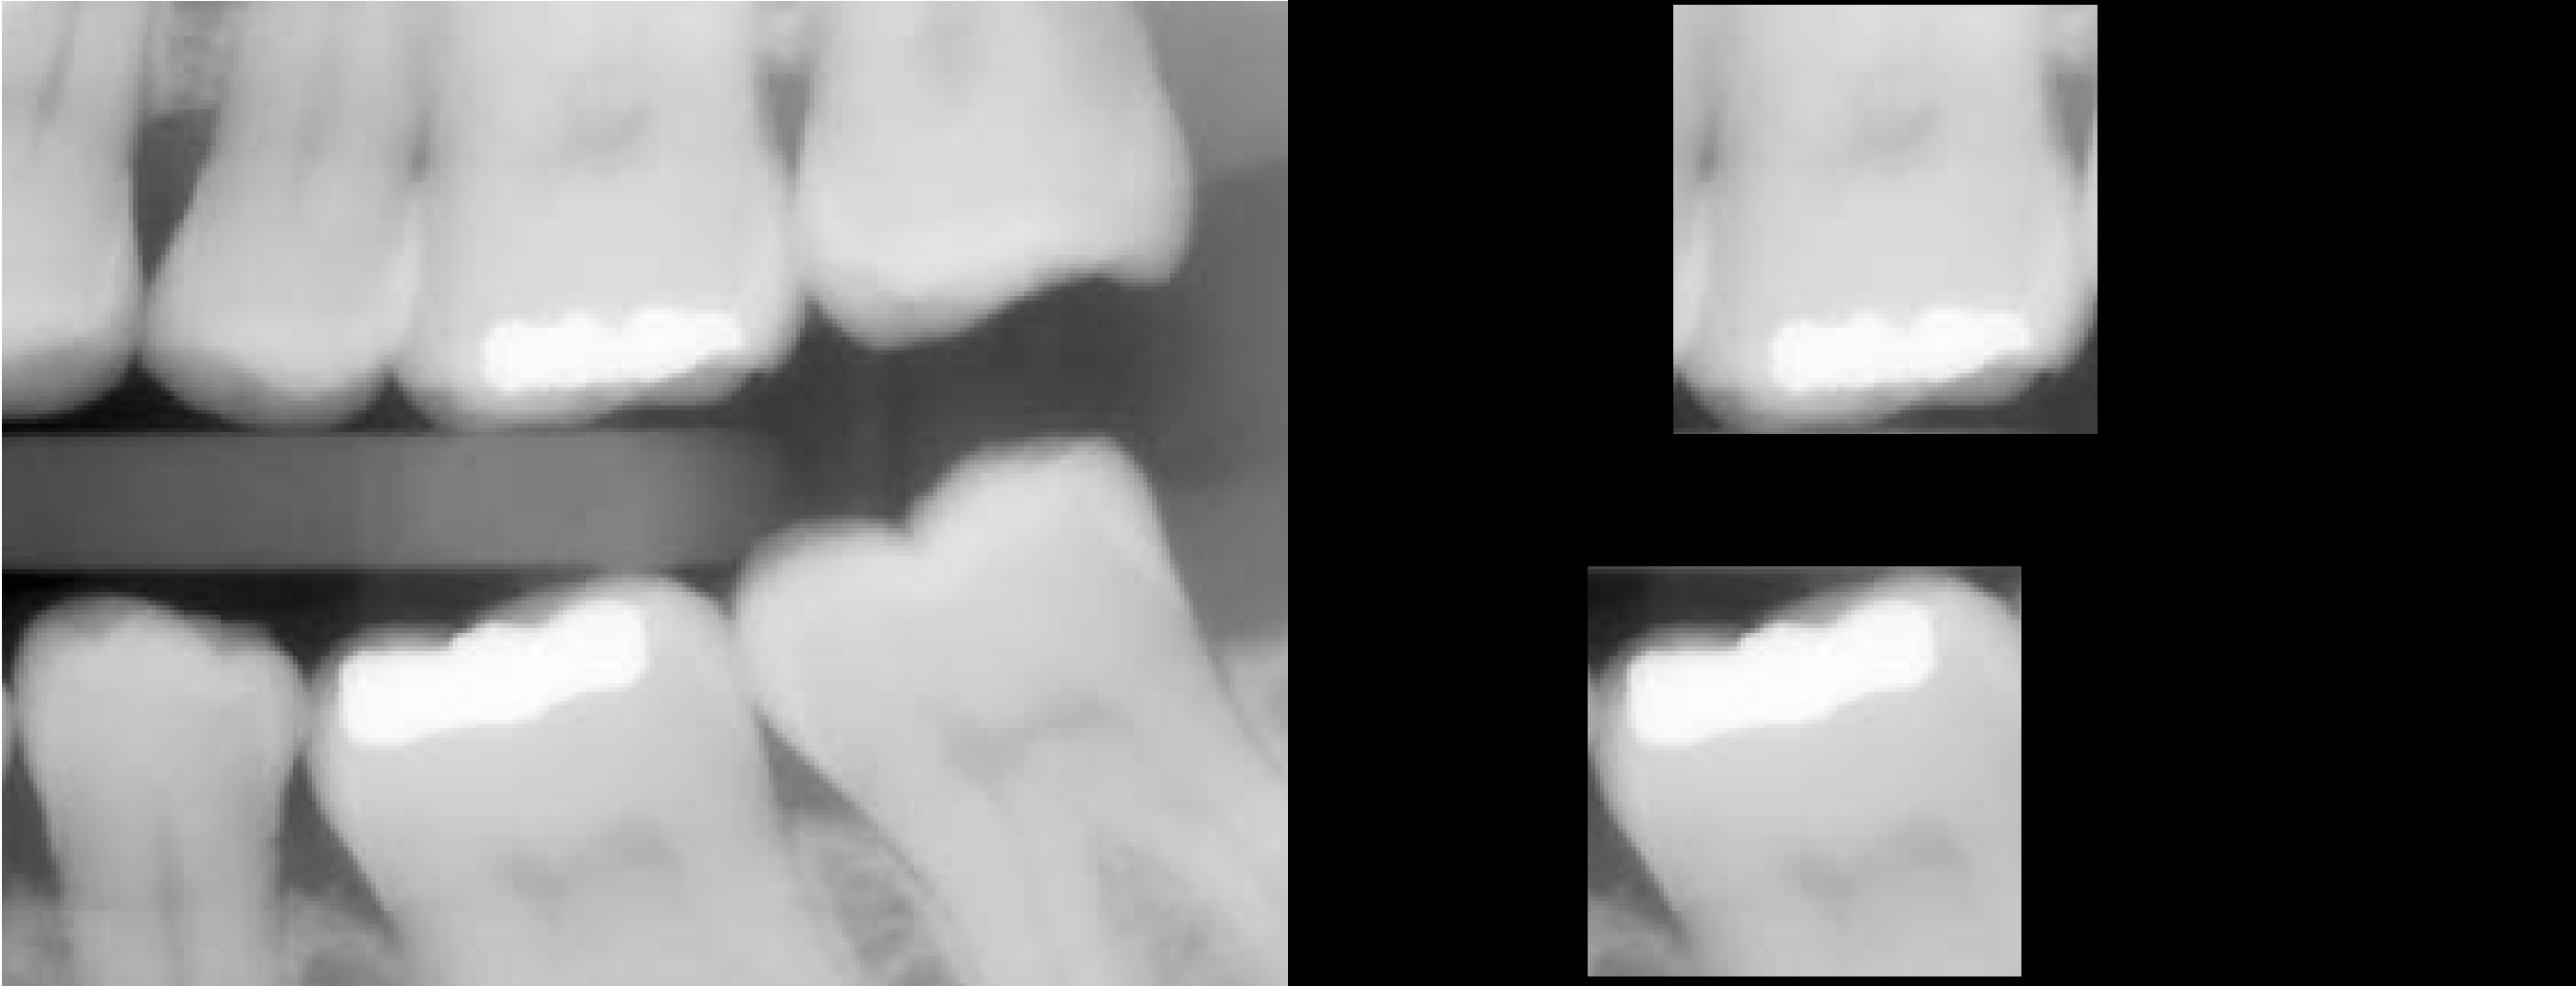

In [9]:
# Practice 4
img_t = cv.imread('/content/drive/MyDrive/PCVK/week5-teeth.jpg')

mask = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.rectangle(mask,pt1=(315,595),pt2=(770,1025),color=(255,255,255),thickness=-1)

result = img_t & mask

mask1 = cv.rectangle(mask,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result = img_t & mask1

teeth_frame = cv.hconcat((img_t, result))
cv2_imshow(teeth_frame)

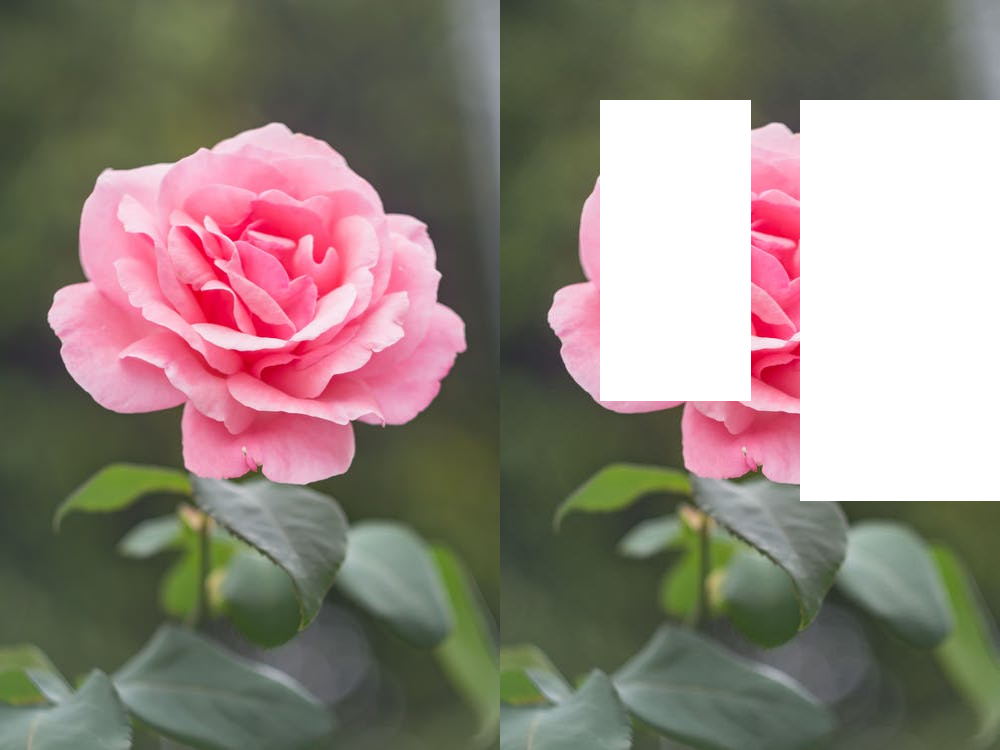

In [39]:
# Assignment OR
img = cv.imread('/content/drive/MyDrive/PCVK/week5-rose_pink.png')
mask_or = np.zeros(img.shape, dtype=np.uint8)
mask_or = cv.rectangle(mask_or,pt1=(250,400),pt2=(100,100),color=(255,255,255),thickness=-1)

result = img | mask_or

mask_or1 = cv.rectangle(mask_or,pt1=(300,100),pt2=(500,500),color=(255,255,255),thickness=-1)

result_or1 = img | mask_or1

final_frame = cv.hconcat((img, result_or1))
cv2_imshow(final_frame)

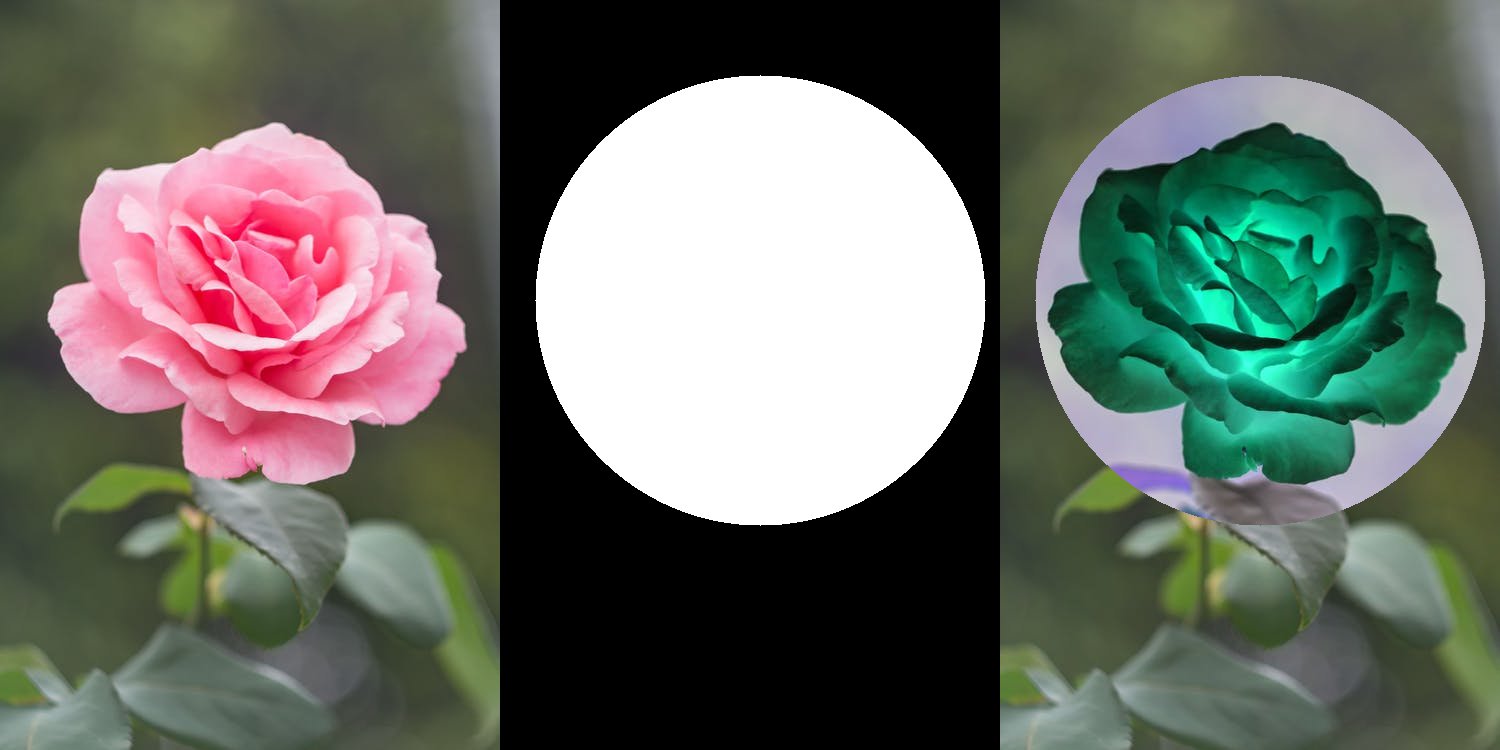

In [21]:
# Assignment NOT
img = cv.imread('/content/drive/MyDrive/PCVK/week5-rose_pink.png')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

result = img ^ mask

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

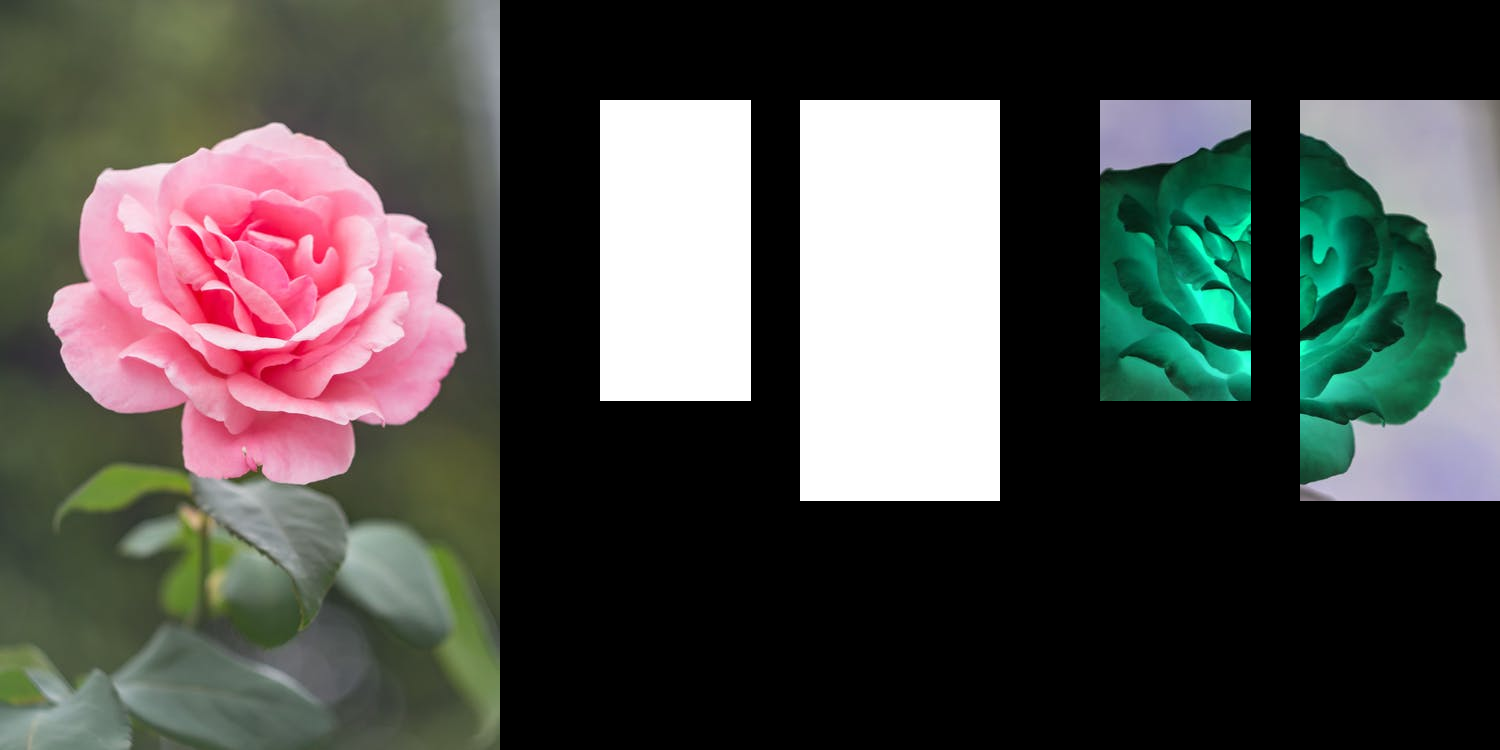

In [42]:
#Assignment NAND
img = cv.imread('/content/drive/MyDrive/PCVK/week5-rose_pink.png')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.rectangle(mask,pt1=(250,400),pt2=(100,100),color=(255,255,255), thickness=-1)
mask = cv.rectangle(mask,pt1=(300,100),pt2=(500,500),color=(255,255,255), thickness=-1)


result = ~img & mask

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

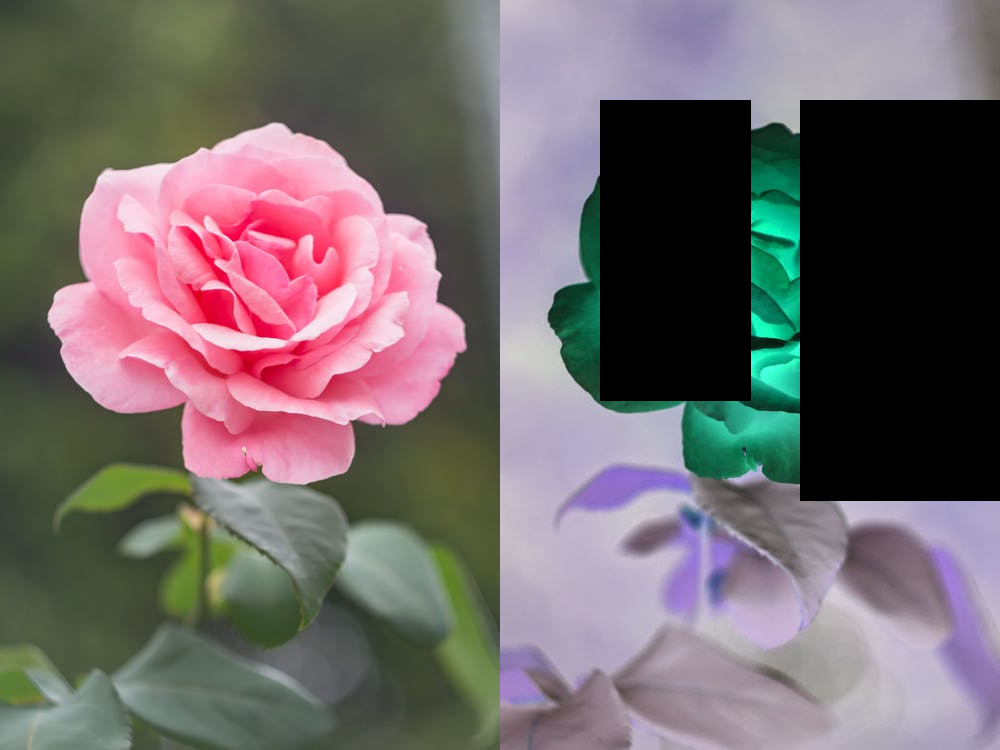

In [43]:
#Assignment XOR
img = cv.imread('/content/drive/MyDrive/PCVK/week5-rose_pink.png')
mask_not = np.zeros(img.shape, dtype=np.uint8)
mask_not = cv.rectangle(mask_not,pt1=(250,400),pt2=(100,100),color=(255,255,255),thickness=-1)

result = ~img & ~mask_not

mask_not1 = cv.rectangle(mask_not,pt1=(300,100),pt2=(500,500),color=(255,255,255),thickness=-1)

result_not1 = ~img & ~mask_not1

final_frame = cv.hconcat((img, result_not1))
cv2_imshow(final_frame)